## Chris Lallo 11/10/2023

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import svd
import matplotlib.pyplot as plt

**Report**

About 75% of the variance is captured by the first principal component, while the second principal component picks up an additional 15% of variance. As seen below, Doug Fister and Cole Hamels are extreme outliers when considering only the first principal component. Likewise, Cliff Lee and Justin Verlander are extreme outliers when considering both the first and the second principal components.

In terms of the first principal component, we can conclude that the O-Swing% has little effect on the outcome. However, we see that Doug Fister's below average Z-Swing% and above average O-Contact% and Z-Contact% mark him as an outlier. Cole Hamel's opposite data marks him as an outlier in the opposite direction.

In terms of the second principal component, we can compare two similar outliers, Cliff Lee and Justin Verlander, as they each have above average O-Swing% and O-Contact%. In contrast, players like Ubaldo Jimenez have negligible O-Swing% and below average Z-Swing%, O-Contact%, and Z-Contact%.

## Functions

In [2]:
def dist_calc(A):
    '''
    Constructs an nxn matrix containing the distance between each (i, j) pair of the
    given nxm matrix.
    Input: An nxm matrix
    Returns: an nxn matrix
    '''
    rows, cols = A.shape
    newA = np.zeros((rows, rows))
    for i in range(rows):
        for j in range(rows):
            player1_pc1 = A[i][0]
            player1_pc2 = A[i][1]
            player2_pc1 = A[j][0]
            player2_pc2 = A[j][1]
            distance = ((player1_pc1 - player2_pc1) ** 2 + (player1_pc2 - player2_pc2) ** 2) ** (1/2)
            newA[i][j] = distance
    return newA

In [3]:
def comp_df(dataframe):
    """
    Input:  dataframe with a 'Name' column
    Returns: A DataFrame with index the 'Name' column of dataframe, 4 columns labelled 'Comp1',...,'Comp4'
    and empty entries.  Meant to be populated with the names of the 4 closest comps.
    """
    names = dataframe['Name']
    m = len(names)
    A = np.empty((m,4),dtype=object)
    df = pd.DataFrame(A,columns=['Comp1','Comp2','Comp3','Comp4'],index = names)
    return df

def dist_mat(df):
    """
    Input:  dataframe with a 'Name' column
    Returns: A DataFrame with index and columns both set to the 'Name' column of dataframe.  All 
    other entries set to 0.  Meant to be populated with the Euclidean squared distance between
    the players first two principal components
    """
    names = list(df['Name'])
    m,_ = df.shape
    B = np.zeros((m,m))
    newdf = pd.DataFrame(B,columns=names,index=names)
    
    return newdf

#Stole this trick from stack exchange
def trunc(values, decs=0):
    """ Truncates an array to the specified number of decimal places
        Inputs: A matrix and the number of decimal places you want to
                truncate to
        Returns: The truncated matrix
    """
    return np.trunc(values*10**decs)/(10**decs)

**Read in dataframe and select only Name, O-Swing%, Z-Swing%, O-Contact%, and Z-Contact%**

In [4]:
rawdf = pd.read_csv("fangraphs_pitching_2010.csv")
columns = ["Name", "O-Swing%", "Z-Swing%", "O-Contact%", "Z-Contact%"]
rawdf = rawdf.loc[:, columns]
rawdf

,Name,O-Swing%,Z-Swing%,O-Contact%,Z-Contact%
0,Cliff Lee,0.304,0.671,0.718,0.884
1,Justin Verlander,0.310,0.645,0.689,0.860
2,Felix Hernandez,0.316,0.626,0.595,0.885
3,Roy Halladay,0.331,0.656,0.646,0.876
4,Ubaldo Jimenez,0.282,0.620,0.626,0.870
...,...,...,...,...,...
87,Randy Wolf,0.251,0.664,0.717,0.904
88,Kyle Kendrick,0.261,0.621,0.773,0.932
89,Brad Bergesen,0.283,0.649,0.755,0.948
90,Rodrigo Lopez,0.283,0.643,0.811,0.924


**Normalize each of the four numerical columns by subtracting the mean**

In [5]:
normdf = rawdf.copy()
A = np.array(normdf.iloc[:, 1:])
A = (A - np.mean(A, axis=0))
normdf.iloc[:, 1:] = A
normdf

,Name,O-Swing%,Z-Swing%,O-Contact%,Z-Contact%
0,Cliff Lee,0.012522,0.02937,0.044402,-0.003054
1,Justin Verlander,0.018522,0.00337,0.015402,-0.027054
2,Felix Hernandez,0.024522,-0.01563,-0.078598,-0.002054
3,Roy Halladay,0.039522,0.01437,-0.027598,-0.011054
4,Ubaldo Jimenez,-0.009478,-0.02163,-0.047598,-0.017054
...,...,...,...,...,...
87,Randy Wolf,-0.040478,0.02237,0.043402,0.016946
88,Kyle Kendrick,-0.030478,-0.02063,0.099402,0.044946
89,Brad Bergesen,-0.008478,0.00737,0.081402,0.060946
90,Rodrigo Lopez,-0.008478,0.00137,0.137402,0.036946


**Plug calculated principal components into dataframe and rename columns accordingly**

In [6]:
U,S,V = svd(A, full_matrices=False)
PCdf = normdf.copy()
PCdf.iloc[:, 1:] = U
PCcols = {"O-Swing%" : "PC1", "Z-Swing%" : "PC2", "O-Contact%" : "PC3", "Z-Contact%" : "PC4"}
PCdf = PCdf.rename(columns=PCcols)
print(PCdf.to_string())

                 Name       PC1       PC2       PC3       PC4
0           Cliff Lee  0.064384  0.125367  0.036403  0.026136
1    Justin Verlander  0.010803  0.101058 -0.086064 -0.055726
2     Felix Hernandez -0.124062 -0.041216 -0.081204  0.115115
3        Roy Halladay -0.052164  0.105419 -0.061409  0.121260
4      Ubaldo Jimenez -0.077516 -0.066511 -0.045673 -0.088805
5        Josh Johnson -0.140953  0.146836 -0.025218 -0.087261
6        Jered Weaver -0.029947  0.195988 -0.277898 -0.270287
7   Francisco Liriano -0.194590  0.058620 -0.108786  0.111326
8         CC Sabathia -0.051629  0.012351 -0.064924  0.057511
9     Adam Wainwright -0.114935 -0.119667 -0.116554  0.001088
10         Jon Lester -0.126890 -0.017973  0.010908 -0.046049
11       Zack Greinke  0.015263 -0.042172  0.030790  0.081253
12        Colby Lewis -0.079264 -0.023370 -0.030116 -0.011501
13    Clayton Kershaw -0.101102 -0.037209 -0.061492 -0.320014
14         Roy Oswalt -0.049944  0.054968  0.061879 -0.234576
15      

In [7]:
pc1var = (S[0] ** 2) / ((S[0] ** 2) + (S[1] ** 2) + (S[2] ** 2) + (S[3] ** 3))
pc2var = ((S[0] ** 2) + (S[1] ** 2)) / ((S[0] ** 2) + (S[1] ** 2) + (S[2] ** 2) + (S[3] ** 3))
print("Variance captured by first principal component:")
print(pc1var)
print("Variance captured by second principal component:")
print(pc2var)

Variance captured by first principal component:
0.748240285206602
Variance captured by second principal component:
0.8992092435074109


**Make a one-dimensional plot using the first principal component**

1-D Outlier Report
Name          Doug Fister
O-Swing%         0.015522
Z-Swing%         -0.10063
O-Contact%       0.155402
Z-Contact%       0.041946
Name          Cole Hamels
O-Swing%         0.002522
Z-Swing%          0.03737
O-Contact%      -0.119598
Z-Contact%      -0.052054


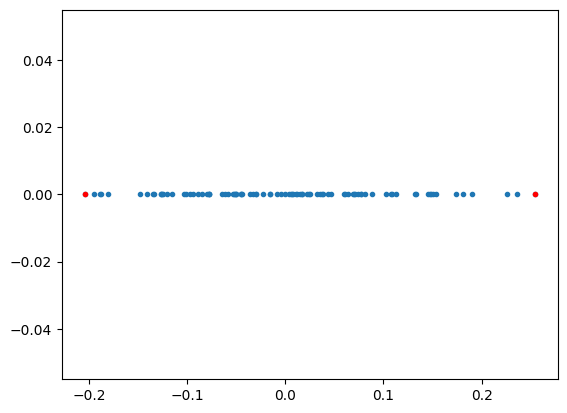

In [8]:
x = U[:, 0]
highIdx = maxIdx = np.array(x).argmax()
lowIdx = maxIdx = np.array(x).argmin()

n = len(x)
z = np.zeros((n, 1))
plt.plot(x, z, ".")
plt.plot(x[highIdx], 0, ".r")
plt.plot(x[lowIdx], 0, ".r")

print("1-D Outlier Report")
print(normdf.iloc[highIdx].to_string())
print(normdf.iloc[lowIdx].to_string())

**Make a two-dimensional plot using the first two principal components**

2-D Outlier Report
Name          Cliff Lee
O-Swing%       0.012522
Z-Swing%        0.02937
O-Contact%     0.044402
Z-Contact%    -0.003054
Name          Justin Verlander
O-Swing%              0.018522
Z-Swing%               0.00337
O-Contact%            0.015402
Z-Contact%           -0.027054
Name          Felix Hernandez
O-Swing%             0.024522
Z-Swing%             -0.01563
O-Contact%          -0.078598
Z-Contact%          -0.002054
Name          Roy Halladay
O-Swing%          0.039522
Z-Swing%           0.01437
O-Contact%       -0.027598
Z-Contact%       -0.011054
Name          Ubaldo Jimenez
O-Swing%           -0.009478
Z-Swing%            -0.02163
O-Contact%         -0.047598
Z-Contact%         -0.017054


C:\Users\chris\AppData\Local\Temp\ipykernel_25228\1603601698.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  idist = (PCdf.iloc[i][1] ** 2 + PCdf.iloc[i][2] ** 2) ** (1/2)


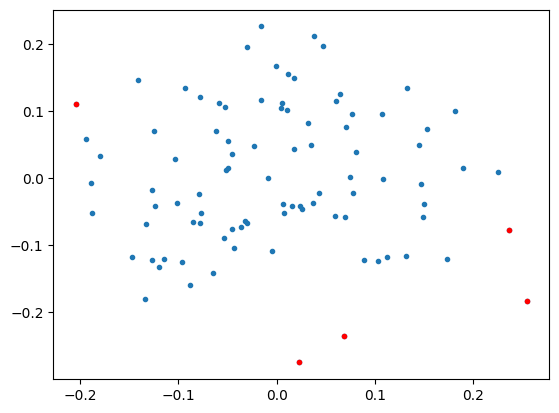

In [9]:
x = U[:, 0]
y = U[:, 1]
plt.plot(x, y, ".")

distances = []
rows, cols = PCdf.shape
for i in range(rows):
    idist = (PCdf.iloc[i][1] ** 2 + PCdf.iloc[i][2] ** 2) ** (1/2)
    distances.append(idist)

print("2-D Outlier Report")
# Ran 5 times to find an outlier with opposite data
for i in range(5):
    maxIdx = np.array(distances).argmax()
    plt.plot(U[maxIdx, 0], U[maxIdx, 1], ".r")
    distances[maxIdx] = 0
    print(normdf.iloc[i].to_string())
    


**Calculate distance matrix**

In [10]:
distdf = dist_mat(PCdf)
compdf = comp_df(PCdf)

In [11]:
distdf.iloc[:, :] = dist_calc(U)

names = distdf.index.values
i = 0
for name in names:
    temp_df = distdf.sort_values(by=name)
    comps = temp_df.index.values[1:5]
    compdf.iloc[i, :] = comps
    i += 1
compdf


,Comp1,Comp2,Comp3,Comp4
Name,,,,
Cliff Lee,Ted Lilly,Matt Garza,Brian Matusz,Jason Vargas
Justin Verlander,Matt Cain,Brett Cecil,R.A. Dickey,Johnny Cueto
Felix Hernandez,Clayton Kershaw,Jon Lester,Jaime Garcia,Gavin Floyd
Roy Halladay,Randy Wells,Shaun Marcum,Dan Haren,Johnny Cueto
Ubaldo Jimenez,Gavin Floyd,Justin Masterson,Jeff Niemann,A.J. Burnett
...,...,...,...,...
Randy Wolf,Jon Garland,Clayton Richard,Roberto Hernandez,Wade Davis
Kyle Kendrick,Paul Maholm,Chris Volstad,Brad Bergesen,Rick Porcello
Brad Bergesen,Kevin Millwood,Dave Bush,Paul Maholm,Kyle Kendrick
